In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

> # PROJECT - EDA
>> ### Data Analysis on "World Happiness Report"
>>> #### Team: Carolina Vieira, Douglas Barbosa, Farley Salomão, Guilherme Tyszka e Karime Campos

## About Dataset

> #### Happiness scored according to economic production, social support, etc
>> #### Context
>>> The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

## Reading & preparing all the data

In [2]:
hp_2015 = pd.read_csv('bases/2015.csv')
hp_2016 = pd.read_csv('bases/2016.csv')
hp_2017 = pd.read_csv('bases/2017.csv')
hp_2018 = pd.read_csv('bases/2018.csv')
hp_2019 = pd.read_csv('bases/2019.csv')

In [3]:
hp_2018 = hp_2018.rename(columns={'Country or region': 'Country'})
hp_2019 = hp_2019.rename(columns={'Country or region': 'Country'})

In [4]:
hp_2015['Year'] = '2015'
hp_2016['Year'] = '2016'
hp_2017['Year'] = '2017'
hp_2018['Year'] = '2018'
hp_2019['Year'] = '2019'

### Padronizing each dataset
> Dropping different & useless columns

> Setting an standard name for the ones which contains the same information

#### 2015

In [5]:
hp_2015_correto = hp_2015.copy()

In [6]:
hp_2015_correto = hp_2015.drop(columns = ['Region',
                                          'Standard Error', 'Dystopia Residual'])

In [7]:
hp_2015_correto.columns=["Country",
"Happiness Rank",
"Happiness Score",
"GPD per capta",
"Family",
"Healthy Life Expectancy",
"Freedom",
"Corruption",
"Generosity",
"Year"]

#### 2016

In [8]:
hp_2016_correto = hp_2016.copy()

In [9]:
hp_2016_correto = hp_2016_correto.drop(columns = ["Region", "Lower Confidence Interval", "Upper Confidence Interval","Dystopia Residual"])

In [10]:
hp_2016_correto.columns=["Country",
"Happiness Rank",
"Happiness Score",
"GPD per capta",
"Family",
"Healthy Life Expectancy",
"Freedom",
"Corruption",
"Generosity",
"Year"]

#### 2017

In [11]:
hp_2017_correto = hp_2017.copy()

In [12]:
hp_2017_correto = hp_2017_correto.drop(columns = ["Whisker.high",
                                                  "Whisker.low", 
                                                  "Dystopia.Residual"])

In [13]:
hp_2017_correto.columns=["Country",
"Happiness Rank",
"Happiness Score",
"GPD per capta",
"Family",
"Healthy Life Expectancy",
"Freedom",
"Generosity",
"Corruption",
"Year"]

#### 2018

In [14]:
hp_2018_correto = hp_2018.copy()

In [15]:
hp_2018_correto.columns= [
    "Happiness Rank",
    "Country",
    "Happiness Score",
    "GPD per capta",
    "Family",
    "Healthy Life Expectancy",
    "Freedom",
    "Generosity",
    "Corruption",
    "Year"]


#### 2019

In [16]:
hp_2019_correto = hp_2019.copy()

In [17]:
hp_2019_correto.columns=[
    "Happiness Rank",
    "Country",
    "Happiness Score",
    "GPD per capta",
    "Family",
    "Healthy Life Expectancy",
    "Freedom",
    "Generosity",
    "Corruption",
    "Year"]

### Concatenating all the datasets & overviewing the content

In [18]:
df_geral = pd.concat(objs = [hp_2015_correto, hp_2016_correto, hp_2017_correto, hp_2018_correto, hp_2019_correto], ignore_index = True)
 

In [19]:
df_geral

,Country,Happiness Rank,Happiness Score,GPD per capta,Family,Healthy Life Expectancy,Freedom,Corruption,Generosity,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015
...,...,...,...,...,...,...,...,...,...,...
777,Rwanda,152,3.334,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,2019
778,Tanzania,153,3.231,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,2019
779,Afghanistan,154,3.203,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,2019
780,Central African Republic,155,3.083,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500,2019


In [20]:
df_geral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  782 non-null    object 
 1   Happiness Rank           782 non-null    int64  
 2   Happiness Score          782 non-null    float64
 3   GPD per capta            782 non-null    float64
 4   Family                   782 non-null    float64
 5   Healthy Life Expectancy  782 non-null    float64
 6   Freedom                  782 non-null    float64
 7   Corruption               781 non-null    float64
 8   Generosity               782 non-null    float64
 9   Year                     782 non-null    object 
dtypes: float64(7), int64(1), object(2)
memory usage: 61.2+ KB


In [21]:
df_geral['Country'].unique()

array(['Switzerland', 'Iceland', 'Denmark', 'Norway', 'Canada', 'Finland',
       'Netherlands', 'Sweden', 'New Zealand', 'Australia', 'Israel',
       'Costa Rica', 'Austria', 'Mexico', 'United States', 'Brazil',
       'Luxembourg', 'Ireland', 'Belgium', 'United Arab Emirates',
       'United Kingdom', 'Oman', 'Venezuela', 'Singapore', 'Panama',
       'Germany', 'Chile', 'Qatar', 'France', 'Argentina',
       'Czech Republic', 'Uruguay', 'Colombia', 'Thailand',
       'Saudi Arabia', 'Spain', 'Malta', 'Taiwan', 'Kuwait', 'Suriname',
       'Trinidad and Tobago', 'El Salvador', 'Guatemala', 'Uzbekistan',
       'Slovakia', 'Japan', 'South Korea', 'Ecuador', 'Bahrain', 'Italy',
       'Bolivia', 'Moldova', 'Paraguay', 'Kazakhstan', 'Slovenia',
       'Lithuania', 'Nicaragua', 'Peru', 'Belarus', 'Poland', 'Malaysia',
       'Croatia', 'Libya', 'Russia', 'Jamaica', 'North Cyprus', 'Cyprus',
       'Algeria', 'Kosovo', 'Turkmenistan', 'Mauritius', 'Hong Kong',
       'Estonia', 'Indonesi

In [22]:
#Renomeando entradas da coluna de países com divergências de grafia
df_geral.replace({
    'Hong Kong S.A.R., China': 'Hong Kong',
    'Taiwan Province of China': 'Taiwan',
    'Trinidad & Tobago': 'Trinidad and Tobago',
    'Somaliland region': 'Somaliland Region',
    'Northern Cyprus':'North Cyprus'
    },inplace = True)

#### Missings 

In [23]:
df_geral.info()
#We can see that there is 1 missing value in the column 'Corruption'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  782 non-null    object 
 1   Happiness Rank           782 non-null    int64  
 2   Happiness Score          782 non-null    float64
 3   GPD per capta            782 non-null    float64
 4   Family                   782 non-null    float64
 5   Healthy Life Expectancy  782 non-null    float64
 6   Freedom                  782 non-null    float64
 7   Corruption               781 non-null    float64
 8   Generosity               782 non-null    float64
 9   Year                     782 non-null    object 
dtypes: float64(7), int64(1), object(2)
memory usage: 61.2+ KB


In [24]:
df_geral[df_geral.isnull().any(axis=1)]
#The missing value is the corruption score for the United Arab Emitees in 2018
#We will treat the missing value by replacing it with the mean

,Country,Happiness Rank,Happiness Score,GPD per capta,Family,Healthy Life Expectancy,Freedom,Corruption,Generosity,Year
489,United Arab Emirates,20,6.774,2.096,0.776,0.67,0.284,NaN,0.186,2018


In [25]:
# Substituting the missing value by the mean:
uae_corrupt_mean = df_geral[df_geral['Country']=='United Arab Emirates']['Corruption'].mean()
df_geral.loc[489,'Corruption'] = uae_corrupt_mean

In [26]:
# Result:
df_geral.loc[489]

Country                    United Arab Emirates
Happiness Rank                               20
Happiness Score                           6.774
GPD per capta                             2.096
Family                                    0.776
Healthy Life Expectancy                    0.67
Freedom                                   0.284
Corruption                             0.311982
Generosity                                0.186
Year                                       2018
Name: 489, dtype: object

In [36]:
df_geral.to_csv('bases\dados_tratados.csv')

## 1. What were the year-to-year changes in the ranking of the top 10 countries?
> Quais foram as alterações ano a ano no ranking dos primeiros 10 países?

### Answer

> #### Preparing & padronizing by rank, country & year
> Preparando e padronizando por rank, país e ano

In [28]:
lista_hp = [hp_2015, hp_2016, hp_2017, hp_2018, hp_2019]

hp_ranking_change = pd.Series(range(1,11,1))
for i in lista_hp:
    hp_ranking_change = pd.concat([hp_ranking_change,i.loc[:9,'Country']], axis=1)
hp_ranking_change.columns = ['Rank' ,'2015', '2016','2017', '2018','2019']
hp_ranking_change.set_index('Rank')


,2015,2016,2017,2018,2019
Rank,,,,,
1,Switzerland,Denmark,Norway,Finland,Finland
2,Iceland,Switzerland,Denmark,Norway,Denmark
3,Denmark,Iceland,Iceland,Denmark,Norway
4,Norway,Norway,Switzerland,Iceland,Iceland
5,Canada,Finland,Finland,Switzerland,Netherlands
6,Finland,Canada,Netherlands,Netherlands,Switzerland
7,Netherlands,Netherlands,Canada,Canada,Sweden
8,Sweden,New Zealand,New Zealand,New Zealand,New Zealand
9,New Zealand,Australia,Sweden,Sweden,Canada


In [29]:
## Utilizando a função melt para gerar uma lista dos países que apareceram nas top 10 posições entre 2015 e 2019.
top_10_2015_2019 = pd.melt(hp_ranking_change, id_vars=['Rank']).value.unique()

In [30]:
df_rank = pd.pivot_table(df_geral[['Country', 'Year', 'Happiness Rank']], columns=['Year'], index=['Country'])
df_rank_10_ord = df_rank.sort_values(('Happiness Rank', '2019')).loc[top_10_2015_2019].astype('int')


cm = sns.light_palette("green", as_cmap=True)
df_rank_10_ord.style.background_gradient(cmap=cm)


In [35]:
df_rank_10_ord.to_csv('tabelas_respostas/tabela_resposta_1.csv')

## 2. Considering the average of all variables, which were the 3 ones that changed the most:
#### Year by year, not counting the score or ranking and also relative to the subsequent year.
>  Considerando a média de todas as variáveis, quais foram as 3 variáveis que mais mudaram:
>> Ano a ano, sem contar o score ou o ranking e relativo ao ano subsequente.

### Working-out

In [32]:
medias_ano = df_geral[['Country', 'Year', 'GPD per capta', 'Family', 'Healthy Life Expectancy', 'Freedom', 'Corruption', 'Generosity']].groupby("Year").mean()
medias_ano

,GPD per capta,Family,Healthy Life Expectancy,Freedom,Corruption,Generosity
Year,,,,,,
2015,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296
2016,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635
2017,0.984718,1.188898,0.551341,0.408786,0.123120,0.246883
2018,0.891449,1.213237,0.597346,0.454506,0.113282,0.181006
2019,0.905147,1.208814,0.725244,0.392571,0.110603,0.184846


In [33]:
medias_ano_shift = medias_ano.copy()
medias_ano_shift = medias_ano_shift.shift(1)
medias_ano_shift

,GPD per capta,Family,Healthy Life Expectancy,Freedom,Corruption,Generosity
Year,,,,,,
2015,NaN,NaN,NaN,NaN,NaN,NaN
2016,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296
2017,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635
2018,0.984718,1.188898,0.551341,0.408786,0.123120,0.246883
2019,0.891449,1.213237,0.597346,0.454506,0.113282,0.181006


In [37]:
delta_medias = abs((medias_ano - medias_ano_shift)/medias_ano_shift)
delta_medias

,GPD per capta,Family,Healthy Life Expectancy,Freedom,Corruption,Generosity
Year,,,,,,
2015,NaN,NaN,NaN,NaN,NaN,NaN
2016,0.127335,0.199209,0.115255,0.134435,0.040427,0.022501
2017,0.032329,0.498067,0.011259,0.101867,0.105385,0.017510
2018,0.094717,0.020472,0.083443,0.111844,0.079908,0.266835
2019,0.015367,0.003646,0.214109,0.136271,0.023652,0.021213


In [38]:
s_2016 = delta_medias.loc['2016'].nlargest(3)
s_2017 = delta_medias.loc['2017'].nlargest(3)
s_2018 = delta_medias.loc['2018'].nlargest(3)
s_2019 = delta_medias.loc['2019'].nlargest(3)
s_concat = pd.concat(objs = [s_2016, s_2017, s_2018, s_2019], axis=1)
s_concat.columns = ['Δ%(2015-2016)', 'Δ%(2016-2017)', 'Δ%(2017-2018)', 'Δ%(2018-2019)']

### Answer:

In [39]:
s_concat

,Δ%(2015-2016),Δ%(2016-2017),Δ%(2017-2018),Δ%(2018-2019)
Family,0.199209,0.498067,NaN,NaN
Freedom,0.134435,0.101867,0.111844,0.136271
GPD per capta,0.127335,NaN,0.094717,NaN
Corruption,NaN,0.105385,NaN,0.023652
Generosity,NaN,NaN,0.266835,NaN
Healthy Life Expectancy,NaN,NaN,NaN,0.214109


In [40]:
for column in s_concat.columns:
    maiores = [[p, i] for p,i in zip(s_concat.loc[:,column], s_concat.loc[:,column].index) if pd.notna(p)]
    print(f'The three indicators with the greatest fluctuations between {column.replace("Δ%(","").replace(")","")} were:\n  1º {maiores[0][1]}: {maiores[0][0]*100:.2f}% | 2º {maiores[1][1]}: {maiores[1][0]*100:.2f}% | 3º {maiores[2][1]}: {maiores[2][0]*100:.2f}%')

The three indicators with the greatest fluctuations between 2015-2016 were:
  1º Family: 19.92% | 2º Freedom: 13.44% | 3º GPD per capta: 12.73%
The three indicators with the greatest fluctuations between 2016-2017 were:
  1º Family: 49.81% | 2º Freedom: 10.19% | 3º Corruption: 10.54%
The three indicators with the greatest fluctuations between 2017-2018 were:
  1º Freedom: 11.18% | 2º GPD per capta: 9.47% | 3º Generosity: 26.68%
The three indicators with the greatest fluctuations between 2018-2019 were:
  1º Freedom: 13.63% | 2º Corruption: 2.37% | 3º Healthy Life Expectancy: 21.41%


In [38]:
s_concat.to_csv('tabelas_respostas/tabela_resposta_2.csv')

## 3. What were the top 3 countries that had the most positive and negative changes in GPD from 2016 to 2017?
> Quais foram os top 3 países que mais tiveram mudanças positivas e negativas de GPD do ano 2016 para 2017?

### Working-out

In [41]:
df_GPD_2016_2017 = pd.merge(hp_2016_correto[['Country', 'GPD per capta']], hp_2017_correto[['Country', 'GPD per capta']], on = 'Country', suffixes = ('_2016', '_2017'))
df_GPD_2016_2017['Difference'] =  df_GPD_2016_2017['GPD per capta_2017'] - df_GPD_2016_2017['GPD per capta_2016']
df_GPD_2016_2017 = df_GPD_2016_2017.sort_values('Difference')

### Answers

#### 3.1) Top 3 countries with the most negative changes in GPD

In [42]:
df_GPD_2016_2017.head(3)

,Country,GPD per capta_2016,GPD per capta_2017,Difference
88,Lebanon,1.12268,1.074988,-0.047692
75,Jordan,0.99673,0.991012,-0.005718
40,Venezuela,1.13367,1.128431,-0.005239


#### 3.2) Top 3 countries with the most positive changes in GPD

In [43]:
df_GPD_2016_2017.tail(3)

,Country,GPD per capta_2016,GPD per capta_2017,Difference
119,Georgia,0.83792,0.950613,0.112693
125,Malawi,0.08709,0.233442,0.146352
128,Mali,0.31292,0.476180,0.163260


In [45]:
df_GPD_2016_2017.head(3).to_csv('tabelas_respostas/tabela_resposta_3_a.csv')
df_GPD_2016_2017.tail(3).to_csv('tabelas_respostas/tabela_resposta_3_b.csv')

## 4. Which country rose the most in the ranking during the entire period analyzed?
> Qual foi o país que mais subiu no ranking durante o período inteiro analisado?

### Working-out

In [46]:
df_rank_2015_2019 = pd.merge(hp_2015_correto[['Country', 'Happiness Rank']], hp_2019_correto[['Country', 'Happiness Rank']], on = 'Country', suffixes = ('_2015', '_2019'))
df_rank_2015_2019['Difference'] =  df_rank_2015_2019['Happiness Rank_2019'] - df_rank_2015_2019['Happiness Rank_2015']
df_rank_2015_2019 = df_rank_2015_2019.sort_values('Difference')

In [47]:
df_rank_2015_2019

,Country,Happiness Rank_2015,Happiness Rank_2019,Difference
145,Benin,155,102,-53
141,Ivory Coast,151,99,-52
98,Honduras,105,59,-46
97,Hungary,104,62,-42
133,Gabon,143,104,-39
...,...,...,...,...
108,Zimbabwe,115,146,31
94,Swaziland,101,135,34
90,Lesotho,97,144,47
80,Zambia,85,138,53


### Answer

In [48]:
df_rank_2015_2019.head(1)

,Country,Happiness Rank_2015,Happiness Rank_2019,Difference
145,Benin,155,102,-53


In [49]:
df_rank_2015_2019.head(1).to_csv('tabelas_respostas/tabela_resposta_4.csv')

## 5. Which countries left or joined the index?
> Quais países que saíram ou entraram do index?

### Working-out

In [50]:
df_in_out = pd.pivot_table(df_geral[['Year', 'Country', 'Happiness Score']], columns=['Year'], index=['Country'])
df_in_out.columns = ['2015', '2016', '2017', '2018', '2019']
df_in_out

,2015,2016,2017,2018,2019
Country,,,,,
Afghanistan,3.575,3.360,3.794,3.632,3.203
Albania,4.959,4.655,4.644,4.586,4.719
Algeria,5.605,6.355,5.872,5.295,5.211
Angola,4.033,3.866,3.795,3.795,NaN
Argentina,6.574,6.650,6.599,6.388,6.086
...,...,...,...,...,...
Venezuela,6.810,6.084,5.250,4.806,4.707
Vietnam,5.360,5.061,5.074,5.103,5.175
Yemen,4.077,3.724,3.593,3.355,3.380


In [51]:
df_in_out = df_in_out.apply(lambda x: ~x.isna())
df_in_out

,2015,2016,2017,2018,2019
Country,,,,,
Afghanistan,True,True,True,True,True
Albania,True,True,True,True,True
Algeria,True,True,True,True,True
Angola,True,True,True,True,False
Argentina,True,True,True,True,True
...,...,...,...,...,...
Venezuela,True,True,True,True,True
Vietnam,True,True,True,True,True
Yemen,True,True,True,True,True


In [52]:
df_in_out_only = df_in_out.loc[~(df_in_out==True).all(axis=1)]
df_in_out_only

df_in_out_only.style.applymap(lambda x: "color: green" if x == True else "color: red") 

,2015,2016,2017,2018,2019
Country,,,,,
Angola,True,True,True,True,False
Belize,False,True,True,True,False
Central African Republic,True,False,True,True,True
Comoros,True,True,False,False,True
Djibouti,True,False,False,False,False
Gambia,False,False,False,False,True
Laos,True,True,False,True,True
Lesotho,True,False,True,True,True
Macedonia,True,True,True,True,False


### Answer

In [53]:
for country in df_in_out_only.index:
    presente = [column for column,cell in zip(df_in_out_only.columns, df_in_out_only.loc[country]) if cell == True]
    ausente = [column for column,cell in zip(df_in_out_only.columns, df_in_out_only.loc[country]) if cell == False]
    print(f'{country.upper()} Presente nos ano(s): {", ".join(presente)} |  Ausente nos ano(s): {", ".join(ausente)}')

ANGOLA Presente nos ano(s): 2015, 2016, 2017, 2018 |  Ausente nos ano(s): 2019
BELIZE Presente nos ano(s): 2016, 2017, 2018 |  Ausente nos ano(s): 2015, 2019
CENTRAL AFRICAN REPUBLIC Presente nos ano(s): 2015, 2017, 2018, 2019 |  Ausente nos ano(s): 2016
COMOROS Presente nos ano(s): 2015, 2016, 2019 |  Ausente nos ano(s): 2017, 2018
DJIBOUTI Presente nos ano(s): 2015 |  Ausente nos ano(s): 2016, 2017, 2018, 2019
GAMBIA Presente nos ano(s): 2019 |  Ausente nos ano(s): 2015, 2016, 2017, 2018
LAOS Presente nos ano(s): 2015, 2016, 2018, 2019 |  Ausente nos ano(s): 2017
LESOTHO Presente nos ano(s): 2015, 2017, 2018, 2019 |  Ausente nos ano(s): 2016
MACEDONIA Presente nos ano(s): 2015, 2016, 2017, 2018 |  Ausente nos ano(s): 2019
MOZAMBIQUE Presente nos ano(s): 2015, 2017, 2018, 2019 |  Ausente nos ano(s): 2016
NAMIBIA Presente nos ano(s): 2016, 2017, 2018, 2019 |  Ausente nos ano(s): 2015
NORTH MACEDONIA Presente nos ano(s): 2019 |  Ausente nos ano(s): 2015, 2016, 2017, 2018
OMAN Presente n

In [54]:
df_in_out_only.to_csv('tabelas_respostas/tabela_resposta_5.csv')

## 6. What were the 3 countries that had the most change in life expectancy, positive and negative - from 2017 to 2018?
> Quais foram os 3 países que mais tiveram mudança na expectativa de vida, positiva e negativa - de 2017 para 2018?

### Working-out

In [55]:
df_expec_2017_2018 = pd.merge(hp_2017_correto[['Country', 'Healthy Life Expectancy']], hp_2018_correto[['Country', 'Healthy Life Expectancy']], on = 'Country', suffixes = ('_2016', '_2017'))
df_expec_2017_2018['Difference'] =  df_expec_2017_2018['Healthy Life Expectancy_2017'] - df_expec_2017_2018['Healthy Life Expectancy_2016']
df_expec_2017_2018 = df_expec_2017_2018.sort_values('Difference', ascending=False)

### Answers

#### 3.1) Top 3 countries with the most positive changes in life expectancy

In [56]:
df_expec_2017_2018.head(3)

,Country,Healthy Life Expectancy_2016,Healthy Life Expectancy_2017,Difference
135,Angola,0.049869,0.269,0.219131
107,Kenya,0.309988,0.454,0.144012
96,South Africa,0.187080,0.330,0.142920


#### 3.2) Top 3 countries with the most negative changes in life expectancy

In [57]:
df_expec_2017_2018.tail(3)

,Country,Healthy Life Expectancy_2016,Healthy Life Expectancy_2017,Difference
122,Mali,0.169366,0.152,-0.017366
130,Niger,0.268505,0.221,-0.047505
20,United Arab Emirates,0.726798,0.670,-0.056798


In [58]:
df_expec_2017_2018.head(3).to_csv('tabelas_respostas/tabela_resposta_6_a.csv')
df_expec_2017_2018.tail(3).to_csv('tabelas_respostas/tabela_resposta_6_b.csv')

## 7. We chose to analyze:

### 7.1) How was Brazil's evolution in the happiness ranking? 
>Como foi a evolução do Brasil no rank de felicidade?

In [59]:
df_geral[df_geral['Country']=='Brazil']

,Country,Happiness Rank,Happiness Score,GPD per capta,Family,Healthy Life Expectancy,Freedom,Corruption,Generosity,Year
15,Brazil,16,6.983,0.981240,1.232870,0.697020,0.490490,0.175210,0.14574,2015
174,Brazil,17,6.952,1.087540,1.039380,0.614150,0.404250,0.141660,0.15776,2016
336,Brazil,22,6.635,1.107353,1.431306,0.616552,0.437454,0.111093,0.16235,2017
497,Brazil,28,6.419,0.986000,1.474000,0.675000,0.493000,0.088000,0.11000,2018
657,Brazil,32,6.300,1.004000,1.439000,0.802000,0.390000,0.086000,0.09900,2019


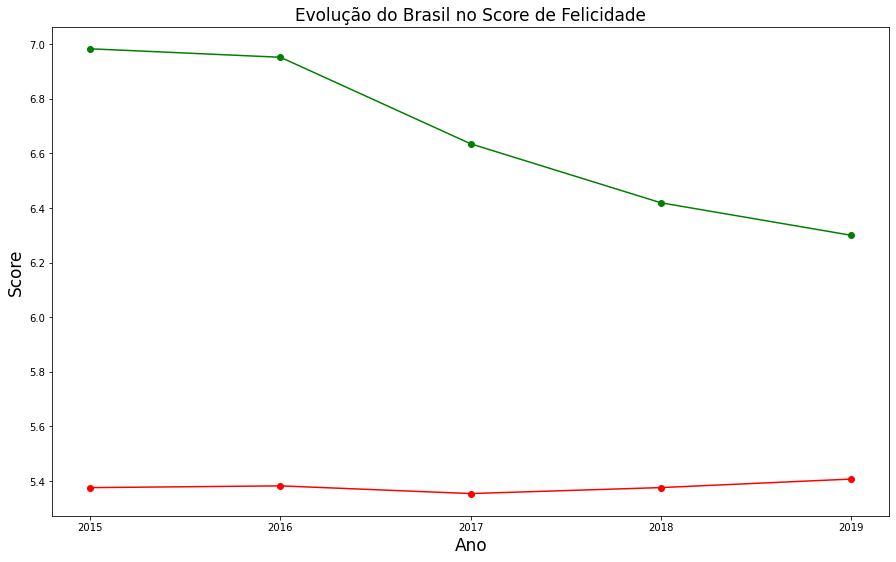

In [60]:
def get_groupby_year(df, column):
    return df[[column,'Year']].groupby("Year").mean().reset_index()[column]

years = df_geral[df_geral['Country']=='Brazil']['Year']
happscore = df_geral[df_geral['Country']=='Brazil']['Happiness Score']
happscore_m = get_groupby_year(df_geral, 'Happiness Score')
plt.figure(figsize=(15,9))
plt.plot(years, happscore, color = 'green', marker = 'o', linestyle = 'solid')
plt.plot(years, happscore_m, color = 'red', marker = 'o', linestyle = 'solid')
ax = plt.gca()
plt.title("Evolução do Brasil no Score de Felicidade", fontsize=17)
plt.ylabel("Score", fontsize=17)  
plt.xlabel('Ano', fontsize=17)

plt.show()

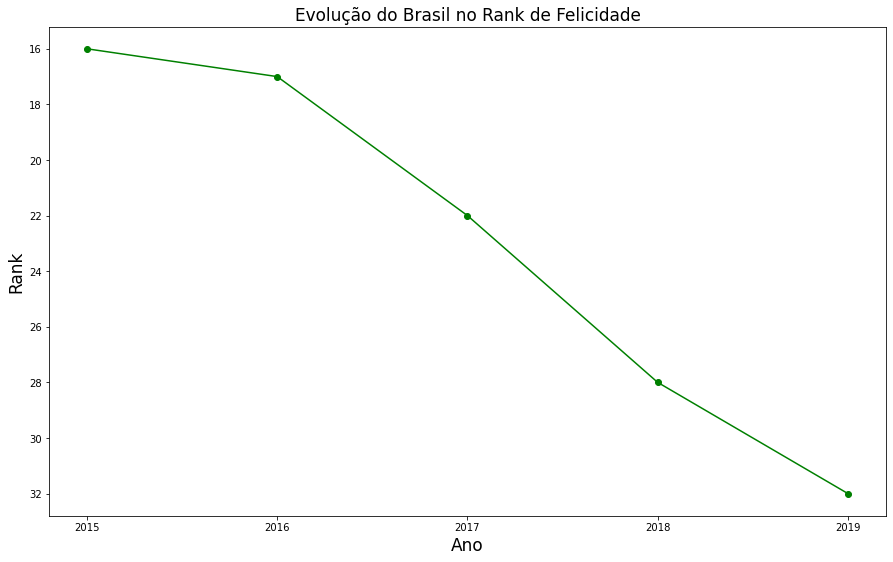

In [61]:
years = df_geral[df_geral['Country']=='Brazil']['Year']
happscore = df_geral[df_geral['Country']=='Brazil']['Happiness Rank']
plt.figure(figsize=(15,9))
plt.plot(years, happscore, color = 'green', marker = 'o', linestyle = 'solid')
ax = plt.gca()
ax.invert_yaxis()
plt.title("Evolução do Brasil no Rank de Felicidade", fontsize=17)
plt.ylabel("Rank", fontsize=17)  
plt.xlabel('Ano', fontsize=17)

plt.show()

> ### Observações:
>> - O Brasil apresentou queda no rank em todos os anos, as quedas foram mais acentuadas entre 2016 e 2018
    Outra observação é que na média mundial as pessoas estão mais felizes.

### 7.2) How the other variables relate to the evolution of Brazil in the happiness rank?
> De que maneira as outras variaveis se relacionam com a evolução do Brasil no rank de felicidade ?

In [62]:
def get_groupby_year(df, column):
    return df[[column,'Year']].groupby("Year").mean().reset_index()[column]

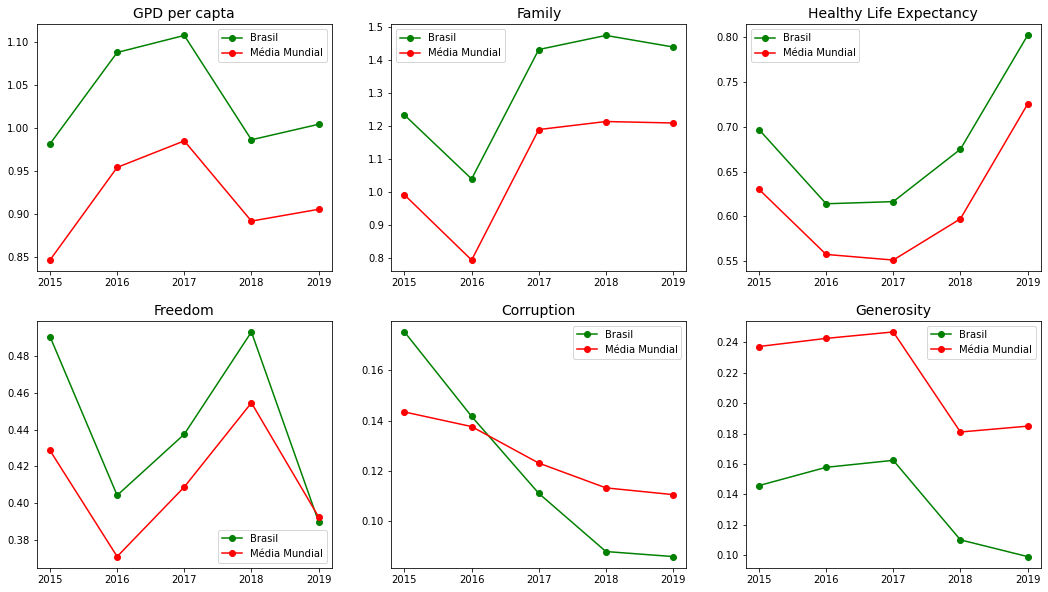

In [64]:
list_var = ['GPD per capta', 'Family', 'Healthy Life Expectancy', 'Freedom', 'Corruption', 'Generosity']
plt.figure(figsize=(18,10))
x = df_geral['Year'].unique()

for var,pos in zip(list_var,range(1,7)):

    y = df_geral[df_geral['Country']=='Brazil'][var]
    y2 = get_groupby_year(df_geral, var)
    plt.subplot(2, 3, pos)
    
    plt.plot(x,y, marker = 'o', color='green', label='Brasil')
    plt.plot(x,y2, marker = 'o', color='red', label='Média Mundial')
    plt.legend(loc='best')
    plt.title(var, fontsize=14) 

plt.show()

> ### Observações gerais:
>> <br> - As colunas 'GPD per capta', 'Family', 'Healthy Life Expectancy', 'Freedom', 'Corruption' e 'Generosity' medem a influência de cada uma dessas variáveis no score de felicidade de um país. </br>
>> <br> - Nos gráficos acima, estão plotadas as séries do Brasil e as médias mundiais das colunas mencionadas. De tal modo, podemos não apenas observar as mudanças nas influências dessas variáveis no Brasil, mas também compará-las com a tendência mundial. </br>
>> <br> - Vale a pena ressaltar que, ao analisar as variáveis, não estamos diante dos valores literais que elas representam, mas sim diante da influência em que cada uma delas exerce no valor final de "Happiness Score". </br>
> ### Observações específicas ao exercício 7:
>> <br> 1) Podemos observar que as influências das variáveis 'GPD per capta', 'Family', 'Healthy Life Expectancy' e 'Freedom' é maior no Brasil do que mundialmente, ainda que o Brasil apresente a mesma tendência de variação (ao longo dos anos, se comparada à do mundo). Além disso, em 2019, no Brasil, o valor da variável 'Freedom' se iguala ao valor da média mundial </br> 
>> <br> 2) A variável 'Generosity' tem mais importância para o mundo do que para o Brasil. Entre 2015 e 2018, ambas se deslocaram na mesma direção, porém, a partir de 2018, elas passam a seguir direções opostas. Apesar disso, a importância continua diminuindo para o Brasil e passa a aumentar para a média mundial.</br> 
>> <br> 3) Também é interessante notar que, tanto para o Brasil quanto para o resto do mundo: </br>
>>> <br> 1. A partir de 2017, a importância da 'Healthy Life Expectancy' tem aumentado rapidamente. </br>
>>> <br> 2.  A influência da variável 'Corruption' cai ano a ano. No entanto, essa queda é mais acentuada no caso brasileiro, visto que essa importância é maior no Brasil no começo da série e termina abaixo da média mundial. </br>

